Oppgave. Finne ut om det er sesong variasjoner i trafikken nordover på E6. 


In [199]:
import pandas as pd
import seaborn as sns
import numpy as np
import glob
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import stats



In [178]:
# Import av en csv fil for undersøkelse
df = pd.read_csv('/home/bjogro/data-science-template/data/trafikkdata_hourly_30552V444220.csv')

In [179]:
df.head()

,node.to,trafikk_id,total.volumeNumbers.volume,"total.volumeNumbers.volume[5.6,..)","total.volumeNumbers.volume[5.6,7.6)","total.volumeNumbers.volume[7.6,12.5)","total.volumeNumbers.volume[12.5,16.0)","total.volumeNumbers.volume[16.0,24.0)","total.volumeNumbers.volume[24.0,..)"
0,2019-01-01T02:00:00+01:00,30552V444220,709.0,7.0,2.0,2.0,3.0,0.0,0.0
1,2019-01-01T03:00:00+01:00,30552V444220,466.0,13.0,7.0,1.0,2.0,3.0,0.0
2,2019-01-01T04:00:00+01:00,30552V444220,225.0,4.0,2.0,0.0,1.0,0.0,1.0
3,2019-01-01T05:00:00+01:00,30552V444220,205.0,17.0,5.0,1.0,8.0,3.0,0.0
4,2019-01-01T06:00:00+01:00,30552V444220,184.0,26.0,1.0,6.0,10.0,8.0,1.0


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   node.to                                8760 non-null   object 
 1   trafikk_id                             8760 non-null   object 
 2   total.volumeNumbers.volume             8758 non-null   float64
 3   total.volumeNumbers.volume[5.6,..)     8758 non-null   float64
 4   total.volumeNumbers.volume[5.6,7.6)    8758 non-null   float64
 5   total.volumeNumbers.volume[7.6,12.5)   8758 non-null   float64
 6   total.volumeNumbers.volume[12.5,16.0)  8758 non-null   float64
 7   total.volumeNumbers.volume[16.0,24.0)  8758 non-null   float64
 8   total.volumeNumbers.volume[24.0,..)    8758 non-null   float64
dtypes: float64(7), object(2)
memory usage: 616.1+ KB


Her ser vi at derte er forskjellig registreringer mellom kolonnene "note.to" som er timene og "total.volumeNumbers.volume" som er antall registrerte passeringer pr time.  Dette indikere hull i dataen?

In [181]:
# Endrer  kolonnen "node.to" til dato.time format
df['node.to'] = pd.to_datetime(df['node.to'], utc=True)



In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype              
---  ------                                 --------------  -----              
 0   node.to                                8760 non-null   datetime64[ns, UTC]
 1   trafikk_id                             8760 non-null   object             
 2   total.volumeNumbers.volume             8758 non-null   float64            
 3   total.volumeNumbers.volume[5.6,..)     8758 non-null   float64            
 4   total.volumeNumbers.volume[5.6,7.6)    8758 non-null   float64            
 5   total.volumeNumbers.volume[7.6,12.5)   8758 non-null   float64            
 6   total.volumeNumbers.volume[12.5,16.0)  8758 non-null   float64            
 7   total.volumeNumbers.volume[16.0,24.0)  8758 non-null   float64            
 8   total.volumeNumbers.volume[24.0,..)    8758 non-null   float64            
dtypes: dateti

In [183]:
# Finner ut om det er celler i data.frame hvor det ikke er registreringer
df.isnull().sum().sum()

14

14 registeringer mangler. dette er to linjer.  Dette er ikke ansett for å endre på analysen.  disse fjernes

In [184]:
# fjerner linjene som ikke har registeringer i seg
df.dropna(inplace=True)

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8758 entries, 0 to 8759
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype              
---  ------                                 --------------  -----              
 0   node.to                                8758 non-null   datetime64[ns, UTC]
 1   trafikk_id                             8758 non-null   object             
 2   total.volumeNumbers.volume             8758 non-null   float64            
 3   total.volumeNumbers.volume[5.6,..)     8758 non-null   float64            
 4   total.volumeNumbers.volume[5.6,7.6)    8758 non-null   float64            
 5   total.volumeNumbers.volume[7.6,12.5)   8758 non-null   float64            
 6   total.volumeNumbers.volume[12.5,16.0)  8758 non-null   float64            
 7   total.volumeNumbers.volume[16.0,24.0)  8758 non-null   float64            
 8   total.volumeNumbers.volume[24.0,..)    8758 non-null   float64            
dtypes: dateti

In [186]:
df.isnull().sum().sum()

0

In [187]:
#setter tidspunktene til indeks for dataframen
df = df.set_index('node.to')

Lager graf av datasettet gruppertpr uke.

In [190]:
df_week = df.resample('W-MON').sum()

<AxesSubplot:xlabel='node.to', ylabel='total.volumeNumbers.volume'>

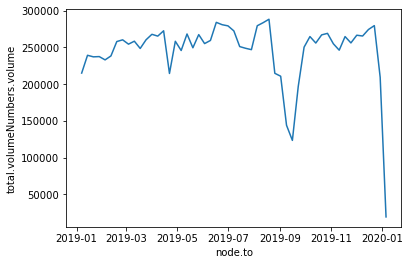

In [191]:
sns.lineplot(data=df_week, x='node.to', y='total.volumeNumbers.volume')

In [192]:
df.index.dayofweek.unique()

Int64Index([1, 2, 3, 4, 5, 6, 0], dtype='int64', name='node.to')

In [193]:
df['dayofweek'] = df.index.dayofweek

In [194]:
df.head()

,trafikk_id,total.volumeNumbers.volume,"total.volumeNumbers.volume[5.6,..)","total.volumeNumbers.volume[5.6,7.6)","total.volumeNumbers.volume[7.6,12.5)","total.volumeNumbers.volume[12.5,16.0)","total.volumeNumbers.volume[16.0,24.0)","total.volumeNumbers.volume[24.0,..)",dayofweek
node.to,,,,,,,,,
2019-01-01 01:00:00+00:00,30552V444220,709.0,7.0,2.0,2.0,3.0,0.0,0.0,1
2019-01-01 02:00:00+00:00,30552V444220,466.0,13.0,7.0,1.0,2.0,3.0,0.0,1
2019-01-01 03:00:00+00:00,30552V444220,225.0,4.0,2.0,0.0,1.0,0.0,1.0,1
2019-01-01 04:00:00+00:00,30552V444220,205.0,17.0,5.0,1.0,8.0,3.0,0.0,1
2019-01-01 05:00:00+00:00,30552V444220,184.0,26.0,1.0,6.0,10.0,8.0,1.0,1


<AxesSubplot:xlabel='node.to', ylabel='total.volumeNumbers.volume'>

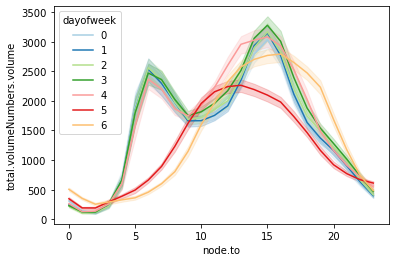

In [195]:

palette=sns.color_palette('Paired', n_colors=7)

sns.lineplot(x=df.index.hour, y=df['total.volumeNumbers.volume'], palette=palette, hue=df['dayofweek'])


Analyserer om det er Outliers i datasettet

In [201]:
z_scores = stats.zscore(df['total.volumeNumbers.volume'])

In [207]:
z_scores.max()

2.7436496048363352

In [208]:
z_scores.min()

-1.4673337532608188

<AxesSubplot:xlabel='dayofweek', ylabel='total.volumeNumbers.volume'>

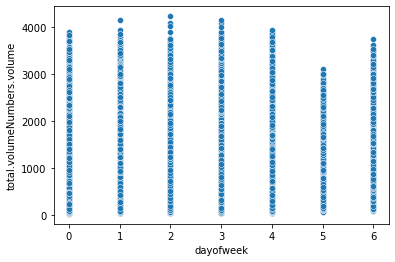

In [210]:
sns.scatterplot(data=df, x='dayofweek', y='total.volumeNumbers.volume')

# Import av resten av filene

In [297]:
# Importere og slår sammen alle csv filene som vi har fått.
filer_fra_tellepunkt = glob.glob('/home/bjogro/data-science-template/data/*.csv')

df_fra_hvert_tellepunkt = (pd.read_csv(f, sep=',') for f in filer_fra_tellepunkt)
df_total   = pd.concat(df_fra_hvert_tellepunkt, ignore_index=True)
del df_fra_hvert_tellepunkt

In [298]:
df_total['trafikk_id'].unique()

array(['30552V444220', '67263V1811577', '73894V444221', '79854V625215',
       '87610V1811579'], dtype=object)

dvs at det er 2733 linjer som ikke har tellinger i seg.  Dette kan væer ett problem

In [299]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41781 entries, 0 to 41780
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   node.to                                41781 non-null  object 
 1   trafikk_id                             41781 non-null  object 
 2   total.volumeNumbers.volume             39048 non-null  float64
 3   total.volumeNumbers.volume[5.6,..)     39048 non-null  float64
 4   total.volumeNumbers.volume[5.6,7.6)    39048 non-null  float64
 5   total.volumeNumbers.volume[7.6,12.5)   39048 non-null  float64
 6   total.volumeNumbers.volume[12.5,16.0)  39048 non-null  float64
 7   total.volumeNumbers.volume[16.0,24.0)  39048 non-null  float64
 8   total.volumeNumbers.volume[24.0,..)    39048 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.9+ MB


In [300]:
#gjør om node.to til et pandas datetime format
df_total['node.to'] = pd.to_datetime(df_total['node.to'], utc=True)

In [301]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41781 entries, 0 to 41780
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype              
---  ------                                 --------------  -----              
 0   node.to                                41781 non-null  datetime64[ns, UTC]
 1   trafikk_id                             41781 non-null  object             
 2   total.volumeNumbers.volume             39048 non-null  float64            
 3   total.volumeNumbers.volume[5.6,..)     39048 non-null  float64            
 4   total.volumeNumbers.volume[5.6,7.6)    39048 non-null  float64            
 5   total.volumeNumbers.volume[7.6,12.5)   39048 non-null  float64            
 6   total.volumeNumbers.volume[12.5,16.0)  39048 non-null  float64            
 7   total.volumeNumbers.volume[16.0,24.0)  39048 non-null  float64            
 8   total.volumeNumbers.volume[24.0,..)    39048 non-null  float64            
dtypes: date

In [302]:
type(df_total['total.volumeNumbers.volume'].iloc[1])

numpy.float64

In [303]:
# setter node.to som index for dataframe
df_total = df_total.set_index('node.to')

In [304]:
df_total.index.dayofweek.unique()

Int64Index([1, 2, 3, 4, 5, 6, 0], dtype='int64', name='node.to')

In [305]:
df_total['dayofweek'] = df_total.index.dayofweek

In [306]:
df_total[df_total['dayofweek'] == 1]

,trafikk_id,total.volumeNumbers.volume,"total.volumeNumbers.volume[5.6,..)","total.volumeNumbers.volume[5.6,7.6)","total.volumeNumbers.volume[7.6,12.5)","total.volumeNumbers.volume[12.5,16.0)","total.volumeNumbers.volume[16.0,24.0)","total.volumeNumbers.volume[24.0,..)",dayofweek
node.to,,,,,,,,,
2019-01-01 01:00:00+00:00,30552V444220,709.0,7.0,2.0,2.0,3.0,0.0,0.0,1
2019-01-01 02:00:00+00:00,30552V444220,466.0,13.0,7.0,1.0,2.0,3.0,0.0,1
2019-01-01 03:00:00+00:00,30552V444220,225.0,4.0,2.0,0.0,1.0,0.0,1.0,1
2019-01-01 04:00:00+00:00,30552V444220,205.0,17.0,5.0,1.0,8.0,3.0,0.0,1
2019-01-01 05:00:00+00:00,30552V444220,184.0,26.0,1.0,6.0,10.0,8.0,1.0,1
...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00+00:00,87610V1811579,127.0,15.0,4.0,1.0,5.0,5.0,0.0,1
2019-12-31 20:00:00+00:00,87610V1811579,84.0,10.0,0.0,1.0,2.0,7.0,0.0,1
2019-12-31 21:00:00+00:00,87610V1811579,88.0,8.0,1.0,3.0,1.0,3.0,0.0,1


In [360]:
df_isnull = df_total.isnull()

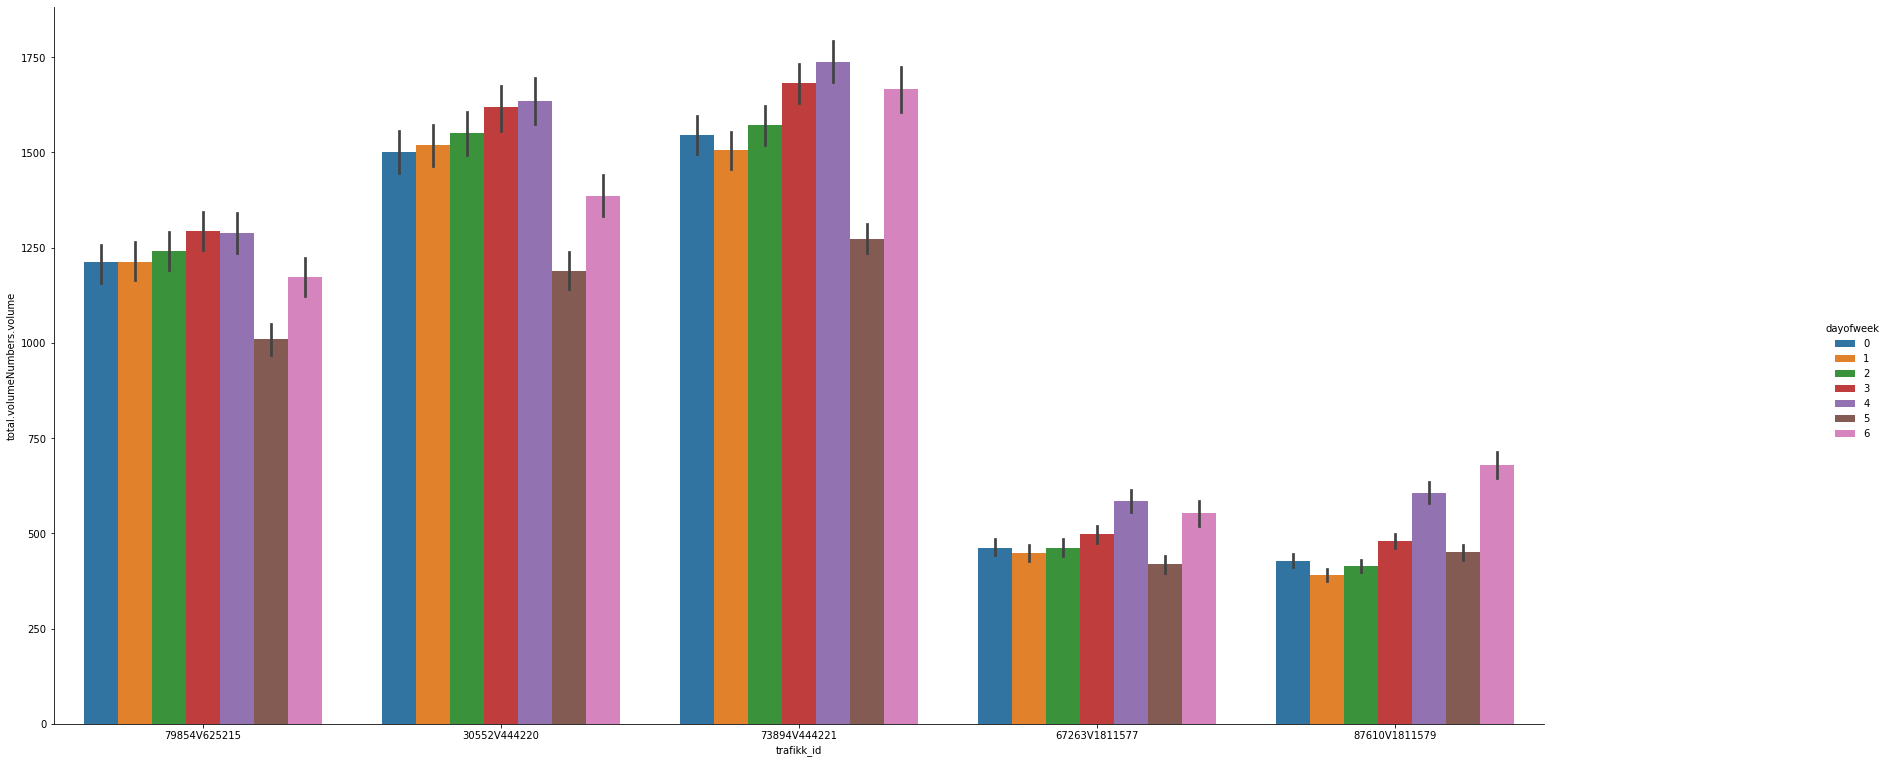

In [308]:


g = sns.catplot(kind = 'bar', y='total.volumeNumbers.volume', x= 'trafikk_id', data = df_total, hue = 'dayofweek', order = ['79854V625215','30552V444220', '73894V444221', '67263V1811577', '87610V1811579']   )#[df_total['dayofweek'] == 6] )
#sns.set(rc={'figure.figsize':(11.7,40.27)})



g.fig.set_figwidth(30.27)
g.fig.set_figheight(11.7)

In [309]:
df_totalweek = df.resample('D').sum()

<AxesSubplot:xlabel='node.to', ylabel='total.volumeNumbers.volume'>

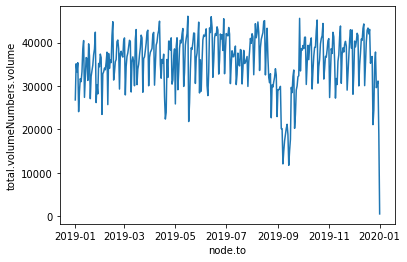

In [310]:
sns.lineplot(data=df_totalweek, x='node.to', y='total.volumeNumbers.volume')

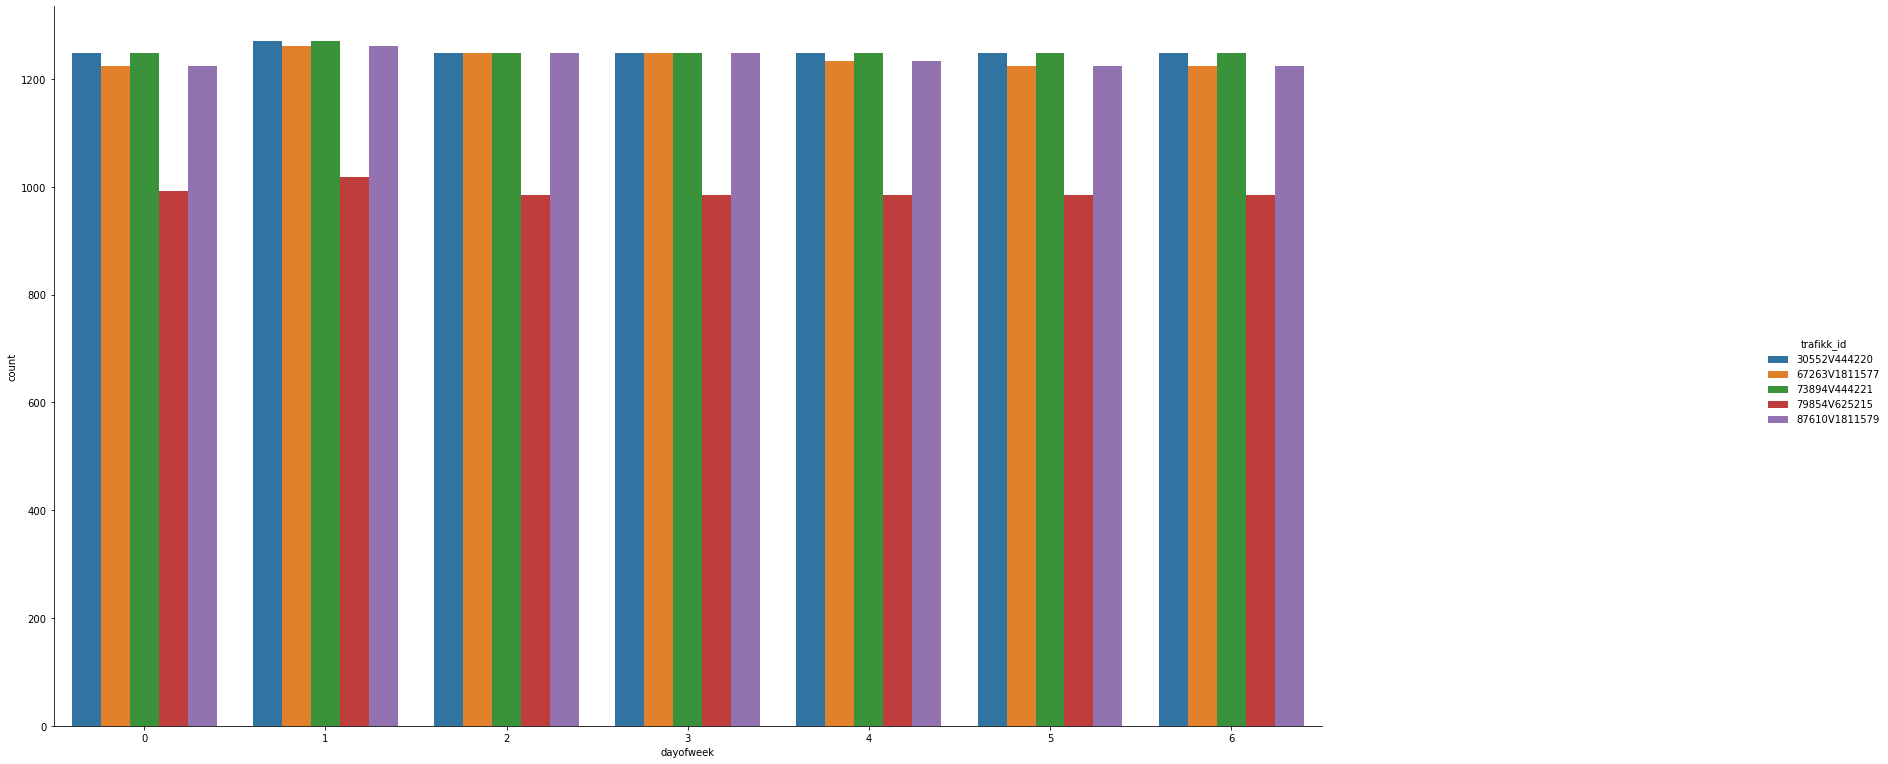

In [311]:
w = sns.catplot(kind = 'count', x= 'dayofweek', data = df_total, hue = 'trafikk_id')#[df_total['dayofweek'] == 6] )
#sns.set(rc={'figure.figsize':(11.7,40.27)})



w.fig.set_figwidth(30.27)
w.fig.set_figheight(11.7)

In [312]:
#palette=sns.color_palette('Paired', n_colors=7)

#b=sns.barplot(x=df_total.index, y=df_total['total.volumeNumbers.volume'], palette=palette, hue=df_total['trafikk_id'])
#b.fig.set_figwidth(30.27)
#b.fig.set_figheight(11.7)

In [313]:
df_isnull.index.strftime('%Y%m')

Index(['201901', '201901', '201901', '201901', '201901', '201901', '201901',
       '201901', '201901', '201901',
       ...
       '201912', '201912', '201912', '201912', '201912', '201912', '201912',
       '201912', '201912', '202001'],
      dtype='object', name='node.to', length=41781)

In [314]:
df_isnull.head()

,trafikk_id,total.volumeNumbers.volume,"total.volumeNumbers.volume[5.6,..)","total.volumeNumbers.volume[5.6,7.6)","total.volumeNumbers.volume[7.6,12.5)","total.volumeNumbers.volume[12.5,16.0)","total.volumeNumbers.volume[16.0,24.0)","total.volumeNumbers.volume[24.0,..)",dayofweek
node.to,,,,,,,,,
2019-01-01 01:00:00+00:00,False,False,False,False,False,False,False,False,False
2019-01-01 02:00:00+00:00,False,False,False,False,False,False,False,False,False
2019-01-01 03:00:00+00:00,False,False,False,False,False,False,False,False,False
2019-01-01 04:00:00+00:00,False,False,False,False,False,False,False,False,False
2019-01-01 05:00:00+00:00,False,False,False,False,False,False,False,False,False


In [361]:
df_isnull['trafikk_id'] = df_total['trafikk_id']

[Text(0, 0, '201901'),
 Text(1, 0, '201902'),
 Text(2, 0, '201903'),
 Text(3, 0, '201904'),
 Text(4, 0, '201905'),
 Text(5, 0, '201906'),
 Text(6, 0, '201907'),
 Text(7, 0, '201908'),
 Text(8, 0, '201909'),
 Text(9, 0, '201910'),
 Text(10, 0, '201911'),
 Text(11, 0, '201912'),
 Text(12, 0, '202001')]

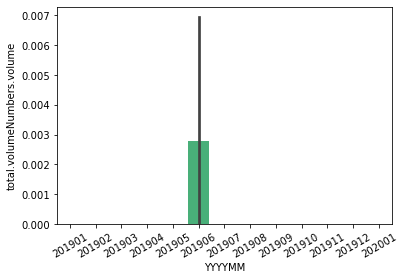

In [315]:
#plotter manglende registeringer for Leirelva bru punktet


df_isnull['YYYYMM'] = df_isnull.index.strftime('%Y%m')
ax = sns.barplot(x='YYYYMM', y='total.volumeNumbers.volume', data = df_isnull.loc[df_isnull['trafikk_id'] == '30552V444220' ] )

ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

[Text(0, 0, '201901'),
 Text(1, 0, '201902'),
 Text(2, 0, '201903'),
 Text(3, 0, '201904'),
 Text(4, 0, '201905'),
 Text(5, 0, '201906'),
 Text(6, 0, '201907'),
 Text(7, 0, '201908'),
 Text(8, 0, '201909'),
 Text(9, 0, '201910'),
 Text(10, 0, '201911'),
 Text(11, 0, '201912'),
 Text(12, 0, '202001')]

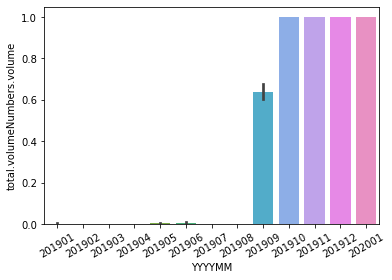

In [316]:
##plotter manglende registeringer for Mogriena punktet
ax = sns.barplot(x='YYYYMM', y='total.volumeNumbers.volume', data = df_isnull.loc[df_isnull['trafikk_id'] == '67263V1811577' ] )
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)


[Text(0, 0, '201901'),
 Text(1, 0, '201902'),
 Text(2, 0, '201903'),
 Text(3, 0, '201904'),
 Text(4, 0, '201905'),
 Text(5, 0, '201906'),
 Text(6, 0, '201907'),
 Text(7, 0, '201908'),
 Text(8, 0, '201909'),
 Text(9, 0, '201910'),
 Text(10, 0, '201911'),
 Text(11, 0, '201912'),
 Text(12, 0, '202001')]

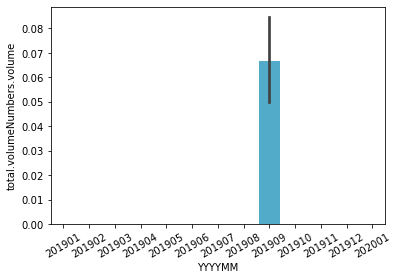

In [317]:
#plotter manglende registeringer for Jessheim punktet
ax = sns.barplot(x='YYYYMM', y='total.volumeNumbers.volume', data = df_isnull.loc[df_isnull['trafikk_id'] == '73894V444221' ] )
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

[Text(0, 0, '201901'),
 Text(1, 0, '201902'),
 Text(2, 0, '201903'),
 Text(3, 0, '201904'),
 Text(4, 0, '201905'),
 Text(5, 0, '201906'),
 Text(6, 0, '201907'),
 Text(7, 0, '201908'),
 Text(8, 0, '201910'),
 Text(9, 0, '201911'),
 Text(10, 0, '201912'),
 Text(11, 0, '202001')]

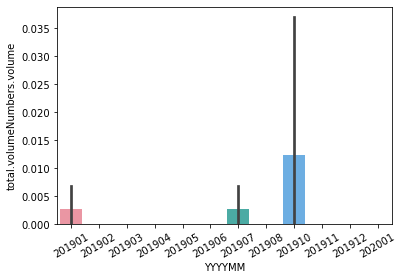

In [318]:
#plotter manglende registeringer for Karihaugen punktet
ax = sns.barplot(x='YYYYMM', y='total.volumeNumbers.volume', data = df_isnull.loc[df_isnull['trafikk_id'] == '79854V625215' ] )
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

[Text(0, 0, '201901'),
 Text(1, 0, '201902'),
 Text(2, 0, '201903'),
 Text(3, 0, '201904'),
 Text(4, 0, '201905'),
 Text(5, 0, '201906'),
 Text(6, 0, '201907'),
 Text(7, 0, '201908'),
 Text(8, 0, '201909'),
 Text(9, 0, '201910'),
 Text(10, 0, '201911'),
 Text(11, 0, '201912'),
 Text(12, 0, '202001')]

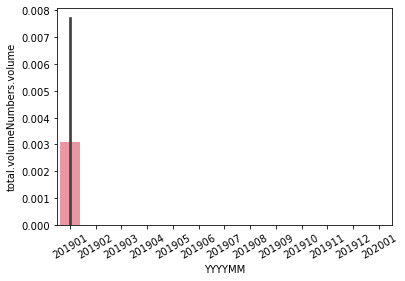

In [319]:
#plotter manglende registeringer for dalskrysset punktet
ax = sns.barplot(x='YYYYMM', y='total.volumeNumbers.volume', data = df_isnull.loc[df_isnull['trafikk_id'] == '87610V1811579' ] )
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

In [320]:
df_total.head()

,trafikk_id,total.volumeNumbers.volume,"total.volumeNumbers.volume[5.6,..)","total.volumeNumbers.volume[5.6,7.6)","total.volumeNumbers.volume[7.6,12.5)","total.volumeNumbers.volume[12.5,16.0)","total.volumeNumbers.volume[16.0,24.0)","total.volumeNumbers.volume[24.0,..)",dayofweek
node.to,,,,,,,,,
2019-01-01 01:00:00+00:00,30552V444220,709.0,7.0,2.0,2.0,3.0,0.0,0.0,1
2019-01-01 02:00:00+00:00,30552V444220,466.0,13.0,7.0,1.0,2.0,3.0,0.0,1
2019-01-01 03:00:00+00:00,30552V444220,225.0,4.0,2.0,0.0,1.0,0.0,1.0,1
2019-01-01 04:00:00+00:00,30552V444220,205.0,17.0,5.0,1.0,8.0,3.0,0.0,1
2019-01-01 05:00:00+00:00,30552V444220,184.0,26.0,1.0,6.0,10.0,8.0,1.0,1


In [321]:
#df_total.drop(df_total['trafikk_id'] == '67263V1811577')

In [322]:
df_total['YYYYMM'] = df_total.index.strftime('%Y%m')

In [323]:
df_leirelva = df_total.loc[df_total['trafikk_id'] == '30552V444220']
df_jessheim = df_total.loc[df_total['trafikk_id'] == '73894V444221']
df_karihaugen = df_total.loc[df_total['trafikk_id'] == '79854V625215']
df_Dalskrysset = df_total.loc[df_total['trafikk_id'] == '87610V1811579']
df_mogreina = df_total.loc[df_total['trafikk_id'] == '67263V1811577']

In [324]:
df_4p = df_total.loc[df_total['trafikk_id'] != '67263V1811577']

<AxesSubplot:xlabel='node.to', ylabel='total.volumeNumbers.volume'>

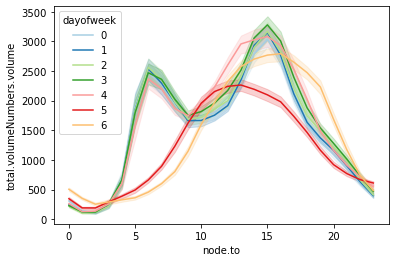

In [325]:
palette=sns.color_palette('Paired', n_colors=7)
sns.lineplot(x=df_leirelva.index.hour, y=df_leirelva['total.volumeNumbers.volume'], palette=palette, hue=df_leirelva['dayofweek'])

<AxesSubplot:xlabel='node.to', ylabel='total.volumeNumbers.volume'>

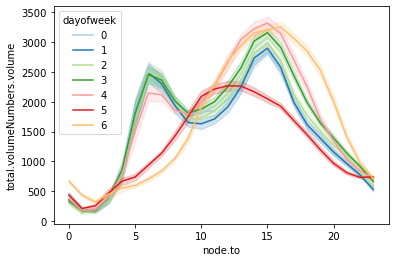

In [326]:
palette=sns.color_palette('Paired', n_colors=7)
#sns.set_style('gist_rainbow')
#sns.set_palette(sns.color_palette("Greens"))
sns.lineplot(x=df_jessheim.index.hour, y=df_jessheim['total.volumeNumbers.volume'], palette=palette, hue=df_jessheim['dayofweek'])

<AxesSubplot:xlabel='node.to', ylabel='total.volumeNumbers.volume'>

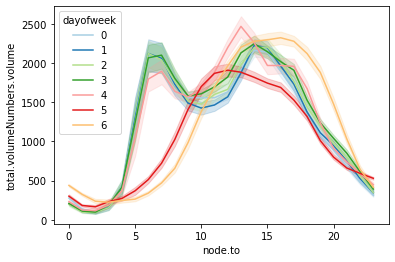

In [327]:
palette=sns.color_palette('Paired', n_colors=7)
sns.lineplot(x=df_karihaugen.index.hour, y=df_karihaugen['total.volumeNumbers.volume'], palette=palette, hue=df_karihaugen['dayofweek'])

<AxesSubplot:xlabel='node.to', ylabel='total.volumeNumbers.volume'>

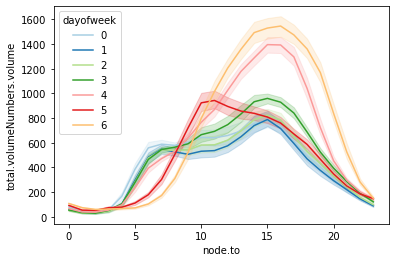

In [328]:
palette=sns.color_palette('Paired', n_colors=7)
sns.lineplot(x=df_Dalskrysset.index.hour, y=df_Dalskrysset['total.volumeNumbers.volume'], palette=palette, hue=df_Dalskrysset['dayofweek'])

<AxesSubplot:xlabel='node.to', ylabel='total.volumeNumbers.volume'>

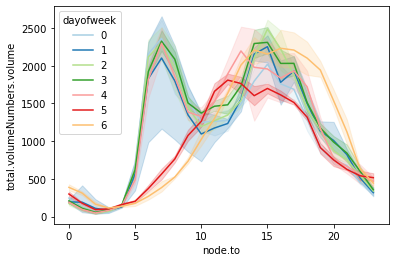

In [330]:
palette=sns.color_palette('Paired', n_colors=7)
sns.lineplot(x=df_karihaugen2.index.hour, y=df_karihaugen2['total.volumeNumbers.volume'], palette=palette, hue=df_karihaugen2['dayofweek'])

<AxesSubplot:xlabel='node.to', ylabel='total.volumeNumbers.volume[16.0,24.0)'>

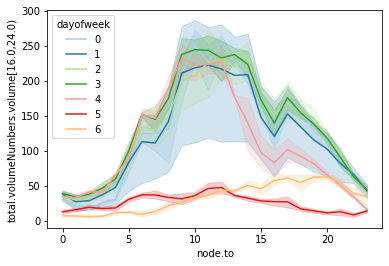

In [254]:
palette=sns.color_palette('Paired', n_colors=7)
sns.lineplot(x=df_karihaugen2.index.hour, y=df_karihaugen2['total.volumeNumbers.volume[16.0,24.0)'], palette=palette, hue=df_karihaugen2['dayofweek'])

<AxesSubplot:xlabel='node.to', ylabel='total.volumeNumbers.volume'>

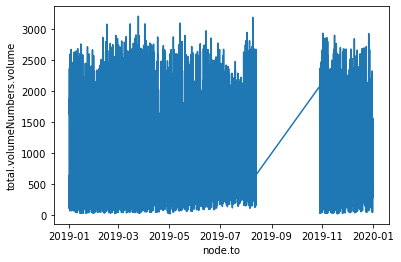

In [293]:
sns.lineplot(data=df_karihaugen, x='node.to', y='total.volumeNumbers.volume')

<AxesSubplot:xlabel='node.to', ylabel='total.volumeNumbers.volume'>

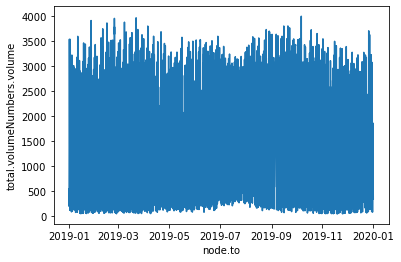

In [294]:
sns.lineplot(data=df_jessheim , x='node.to', y='total.volumeNumbers.volume')

<AxesSubplot:xlabel='node.to', ylabel='total.volumeNumbers.volume'>

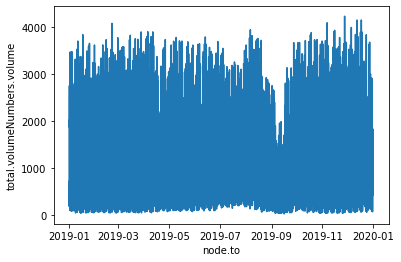

In [295]:
sns.lineplot(data=df_leirelva , x='node.to', y='total.volumeNumbers.volume')

<AxesSubplot:xlabel='node.to', ylabel='total.volumeNumbers.volume'>

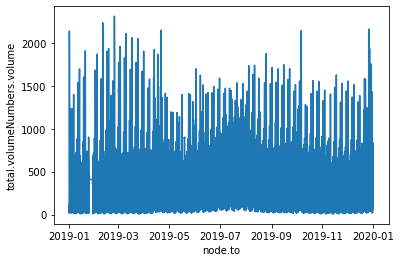

In [296]:
sns.lineplot(data=df_Dalskrysset  , x='node.to', y='total.volumeNumbers.volume')

<AxesSubplot:xlabel='node.to', ylabel='total.volumeNumbers.volume'>

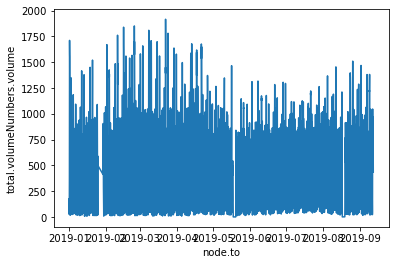

In [331]:
sns.lineplot(data=df_mogreina  , x='node.to', y='total.volumeNumbers.volume')

In [290]:
import matplotlib.pyplot as plt

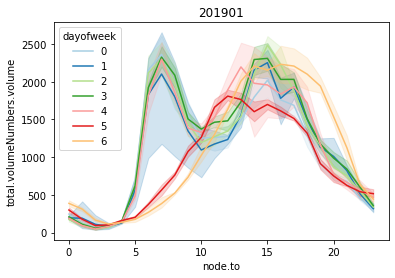

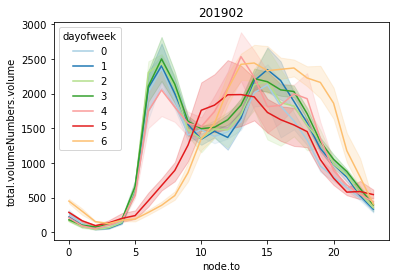

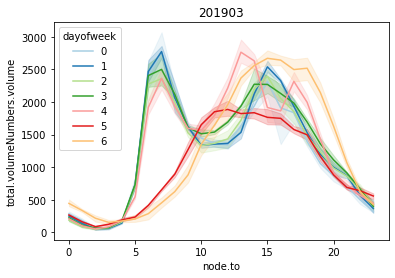

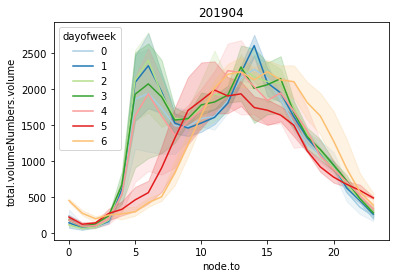

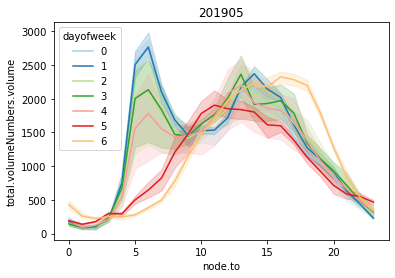

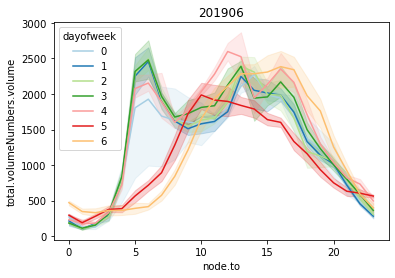

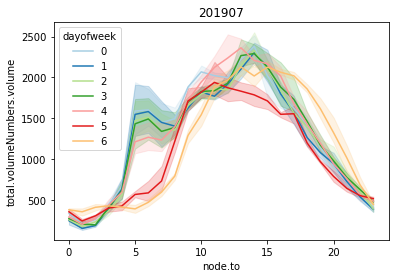

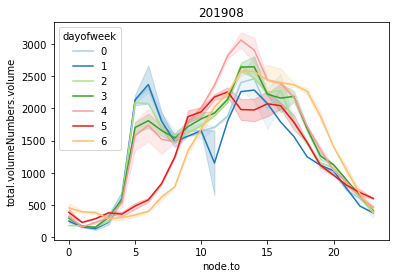

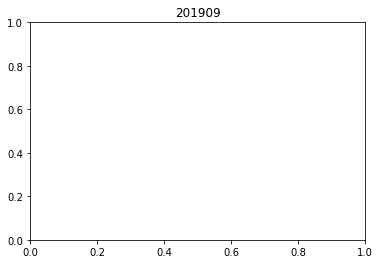

ValueError: The palette list has the wrong number of colors.

In [292]:
l = []
palette=sns.color_palette('Paired', n_colors=7)

for i in range (201901,201913):
    i = str(i)
    df_plot = df_karihaugen[df_karihaugen['YYYYMM'] == i]
    l.append(df_plot)
    
    
    sns.lineplot(x=df_plot.index.hour, y=df_plot['total.volumeNumbers.volume'], palette=palette, hue=df_plot['dayofweek']).set_title(i)
    
    plt.show()
print(len(l))

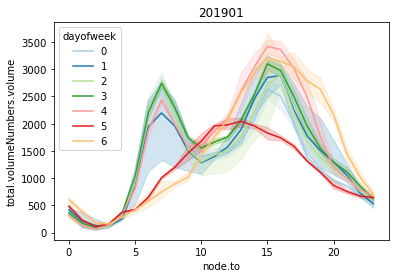

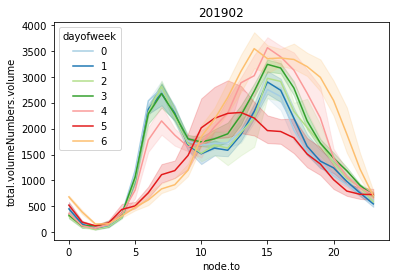

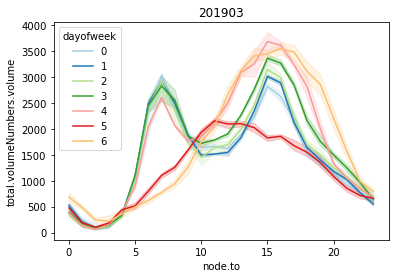

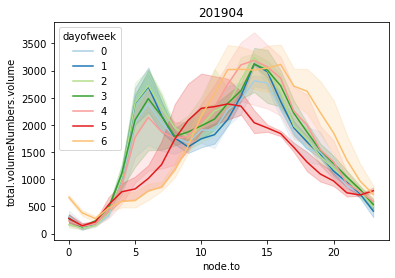

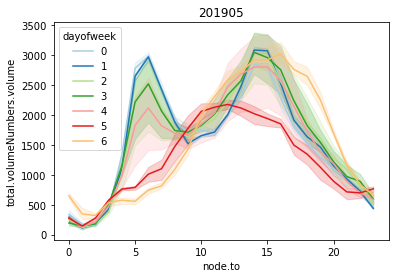

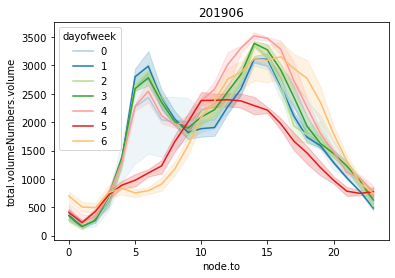

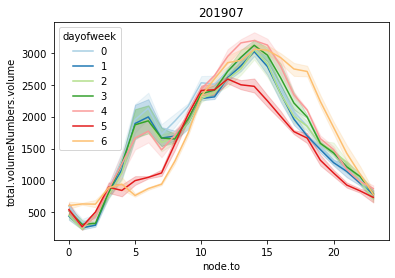

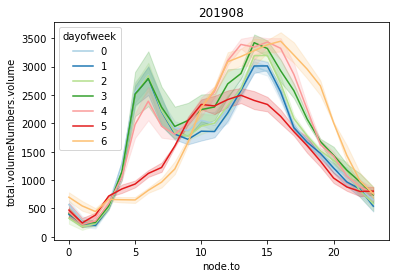

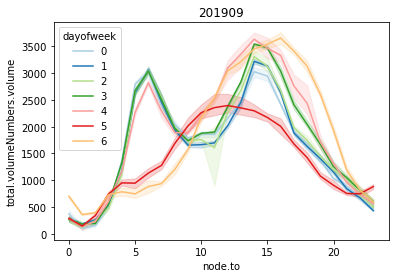

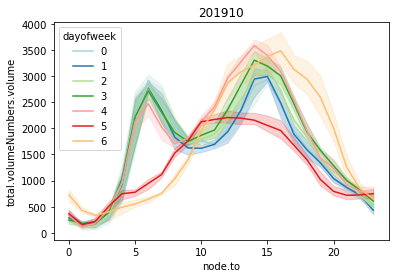

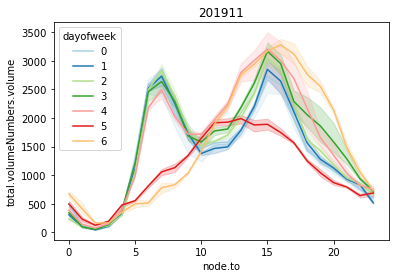

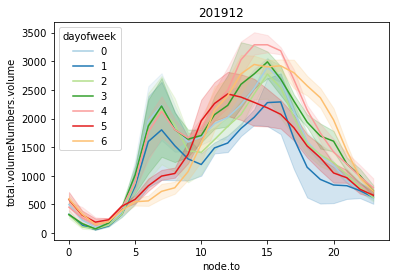

12


In [332]:
l = []
palette=sns.color_palette('Paired', n_colors=7)

for i in range (201901,201913):
    i = str(i)
    df_plot = df_jessheim[df_jessheim['YYYYMM'] == i]
    l.append(df_plot)
    
    
    sns.lineplot(x=df_plot.index.hour, y=df_plot['total.volumeNumbers.volume'], palette=palette, hue=df_plot['dayofweek']).set_title(i)
    
    plt.show()
print(len(l))

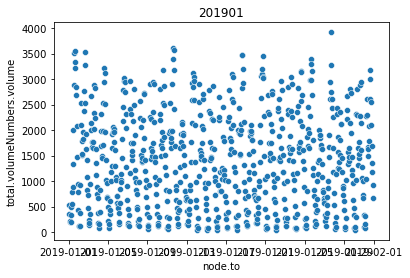

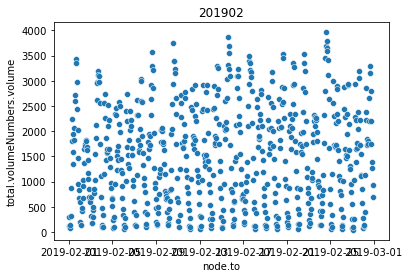

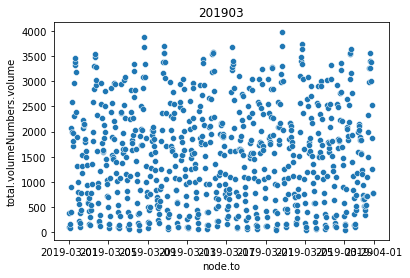

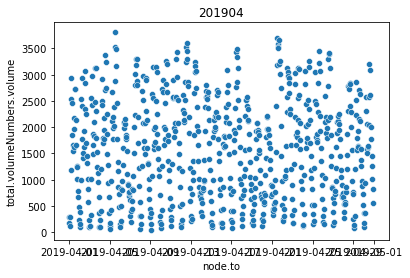

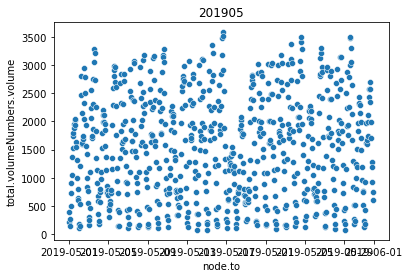

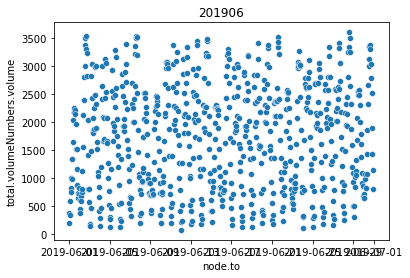

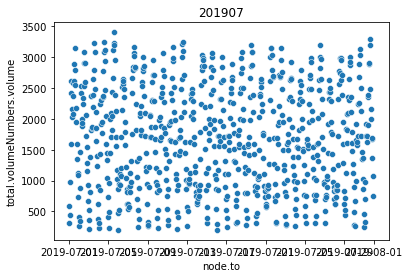

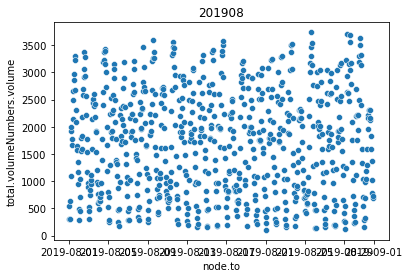

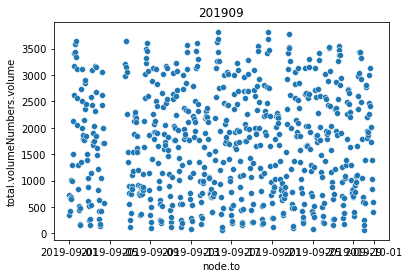

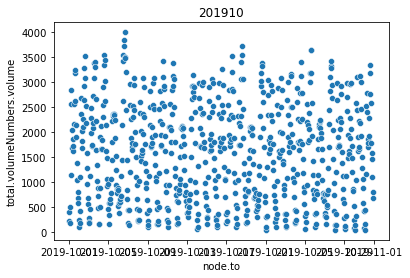

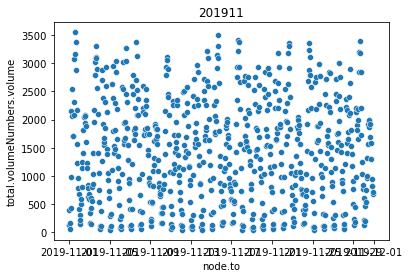

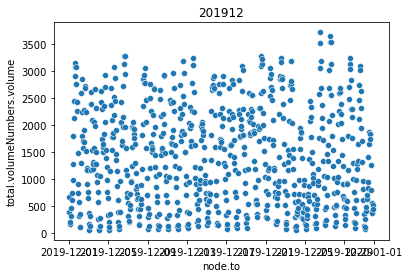

12


In [339]:
l = []
palette=sns.color_palette('Paired', n_colors=7)

for i in range (201901,201913):
    i = str(i)
    df_plot = df_jessheim[df_jessheim['YYYYMM'] == i]
    l.append(df_plot)
    
    
    sns.scatterplot(data=df_plot , x='node.to', y='total.volumeNumbers.volume',).set_title(i)
    
    plt.show()
print(len(l))

In [338]:
df_plot = df_karihaugen[df_karihaugen['YYYYMM'] == '201901']

In [269]:
df_plot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 743 entries, 2019-01-01 01:00:00+00:00 to 2019-01-31 23:00:00+00:00
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   trafikk_id                             743 non-null    object 
 1   total.volumeNumbers.volume             741 non-null    float64
 2   total.volumeNumbers.volume[5.6,..)     741 non-null    float64
 3   total.volumeNumbers.volume[5.6,7.6)    741 non-null    float64
 4   total.volumeNumbers.volume[7.6,12.5)   741 non-null    float64
 5   total.volumeNumbers.volume[12.5,16.0)  741 non-null    float64
 6   total.volumeNumbers.volume[16.0,24.0)  741 non-null    float64
 7   total.volumeNumbers.volume[24.0,..)    741 non-null    float64
 8   dayofweek                              743 non-null    int64  
 9   YYYYMM                                 743 non-null    object 
dtypes: float64(7), int64(1), 

<AxesSubplot:xlabel='node.to', ylabel='total.volumeNumbers.volume[16.0,24.0)'>

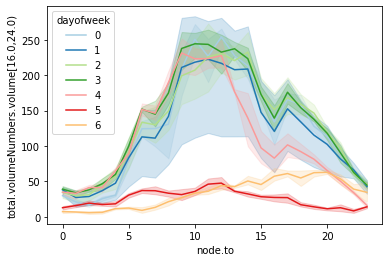

In [270]:
palette=sns.color_palette('Paired', n_colors=7)
sns.lineplot(x=df_plot.index.hour, y=df_plot['total.volumeNumbers.volume[16.0,24.0)'], palette=palette, hue=df_plot['dayofweek'])

In [158]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41781 entries, 2019-01-01 01:00:00+00:00 to 2020-01-01 00:00:00+00:00
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   trafikk_id                             41781 non-null  object 
 1   total.volumeNumbers.volume             39048 non-null  float64
 2   total.volumeNumbers.volume[5.6,..)     39048 non-null  float64
 3   total.volumeNumbers.volume[5.6,7.6)    39048 non-null  float64
 4   total.volumeNumbers.volume[7.6,12.5)   39048 non-null  float64
 5   total.volumeNumbers.volume[12.5,16.0)  39048 non-null  float64
 6   total.volumeNumbers.volume[16.0,24.0)  39048 non-null  float64
 7   total.volumeNumbers.volume[24.0,..)    39048 non-null  float64
 8   dayofweek                              41781 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 4.2+ MB


In [160]:
type(df_total.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [362]:
df_isnull.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41781 entries, 2019-01-01 01:00:00+00:00 to 2020-01-01 00:00:00+00:00
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   trafikk_id                             41781 non-null  object
 1   total.volumeNumbers.volume             41781 non-null  bool  
 2   total.volumeNumbers.volume[5.6,..)     41781 non-null  bool  
 3   total.volumeNumbers.volume[5.6,7.6)    41781 non-null  bool  
 4   total.volumeNumbers.volume[7.6,12.5)   41781 non-null  bool  
 5   total.volumeNumbers.volume[12.5,16.0)  41781 non-null  bool  
 6   total.volumeNumbers.volume[16.0,24.0)  41781 non-null  bool  
 7   total.volumeNumbers.volume[24.0,..)    41781 non-null  bool  
 8   dayofweek                              41781 non-null  bool  
 9   YYYYMM                                 41781 non-null  bool  
dtypes: bool(9), object(1)
memory usage:

In [379]:
df_notnull = (1-df_isnull['total.volumeNumbers.volume']) 
df_notnull = pd.concat([df_notnull, df_isnull['trafikk_id']], axis=1)




In [382]:
df_notnull

,total.volumeNumbers.volume,trafikk_id
node.to,,
2019-01-01 01:00:00+00:00,1,30552V444220
2019-01-01 02:00:00+00:00,1,30552V444220
2019-01-01 03:00:00+00:00,1,30552V444220
2019-01-01 04:00:00+00:00,1,30552V444220
2019-01-01 05:00:00+00:00,1,30552V444220
...,...,...
2019-12-31 20:00:00+00:00,1,87610V1811579
2019-12-31 21:00:00+00:00,1,87610V1811579
2019-12-31 22:00:00+00:00,1,87610V1811579


In [383]:
df_valuesdaily

,total.volumeNumbers.volume
node.to,
2019-01-01 00:00:00+00:00,115
2019-01-02 00:00:00+00:00,120
2019-01-03 00:00:00+00:00,120
2019-01-04 00:00:00+00:00,120
2019-01-05 00:00:00+00:00,120
...,...
2019-12-28 00:00:00+00:00,96
2019-12-29 00:00:00+00:00,96
2019-12-30 00:00:00+00:00,96


In [385]:
df_leirelva_null = df_notnull.loc[df_total['trafikk_id'] == '30552V444220']
df_jessheim_null = df_notnull.loc[df_total['trafikk_id'] == '73894V444221']
df_karihaugen_null = df_notnull.loc[df_total['trafikk_id'] == '79854V625215']
df_Dalskrysset_null = df_notnull.loc[df_total['trafikk_id'] == '87610V1811579']
df_mogreina_null = df_notnull.loc[df_total['trafikk_id'] == '67263V1811577']

In [386]:
df_valuesdaily = df_karihaugen_null.resample('D').sum()

In [387]:
df_valuesdaily

,total.volumeNumbers.volume
node.to,
2019-01-01 00:00:00+00:00,23
2019-01-02 00:00:00+00:00,24
2019-01-03 00:00:00+00:00,24
2019-01-04 00:00:00+00:00,24
2019-01-05 00:00:00+00:00,24
...,...
2019-12-28 00:00:00+00:00,24
2019-12-29 00:00:00+00:00,24
2019-12-30 00:00:00+00:00,24


<AxesSubplot:xlabel='node.to', ylabel='total.volumeNumbers.volume'>

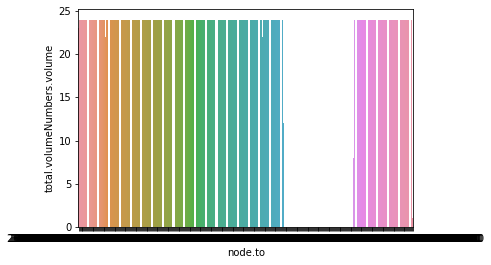

In [390]:
sns.barplot(x=df_valuesdaily.index, y='total.volumeNumbers.volume', data = df_valuesdaily )

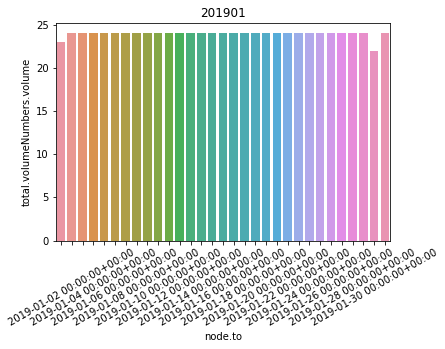

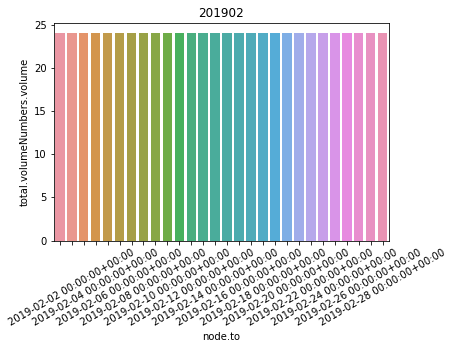

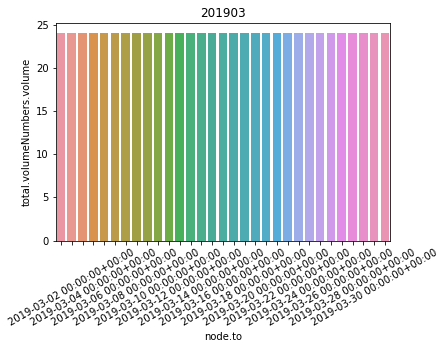

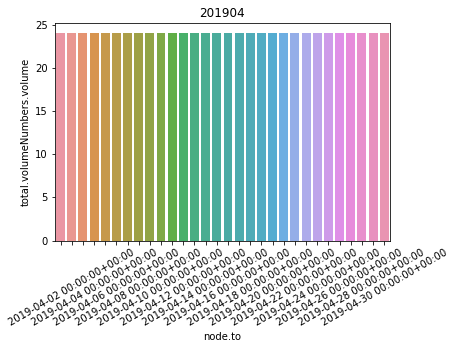

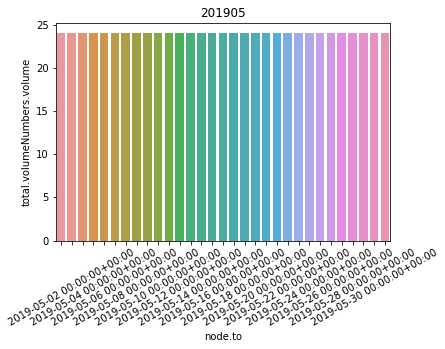

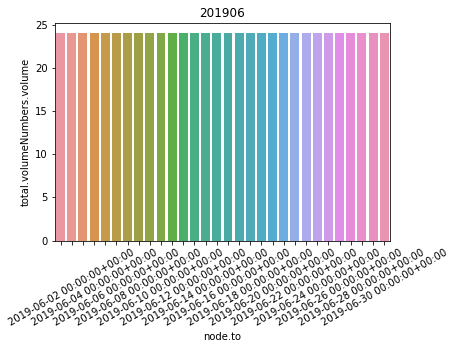

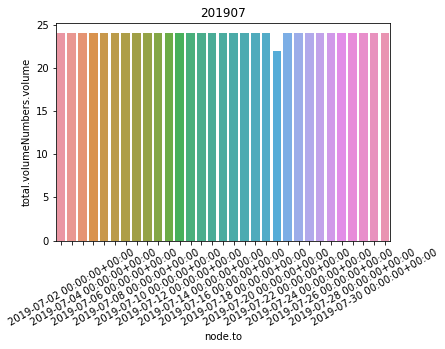

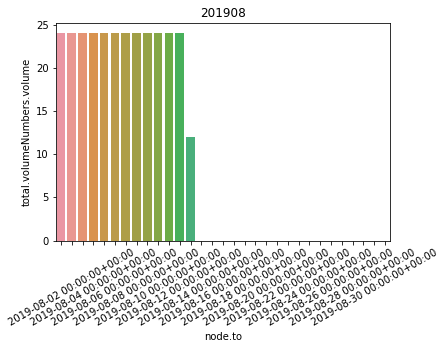

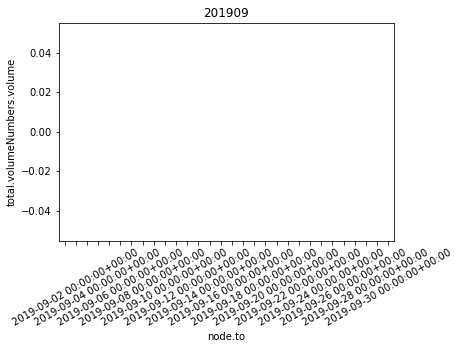

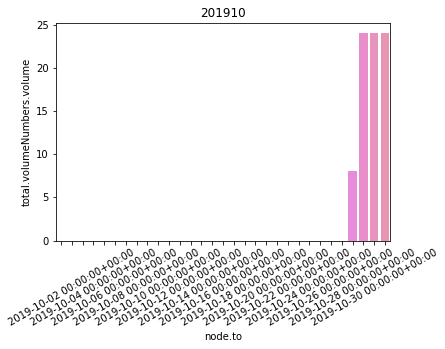

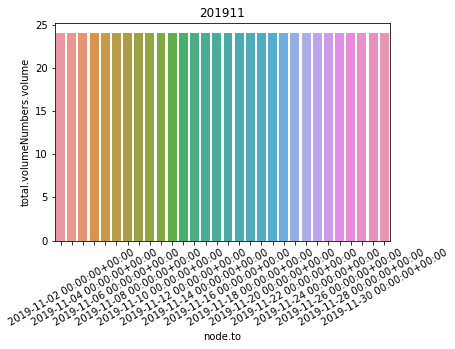

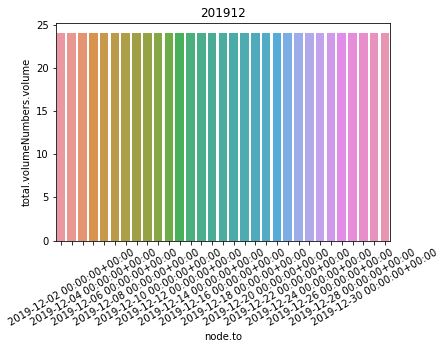

12


In [398]:
df_valuesdaily['YYYYMM'] = df_valuesdaily.index.strftime('%Y%m')
l = []
palette=sns.color_palette('Paired', n_colors=7)

for i in range (201901,201913):
    i = str(i)
    df_plot = df_valuesdaily[df_valuesdaily['YYYYMM'] == i]
    l.append(df_plot)
    
    ax = sns.barplot(x=df_plot.index, y='total.volumeNumbers.volume', data = df_plot )
    ax.set_title(i)
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
#    sns.lineplot(x=df_plot.index.hour, y=df_plot['total.volumeNumbers.volume'], palette=palette, hue=df_plot['dayofweek']).set_title(i)
    for label in ax.xaxis.get_ticklabels()[::2]:
        label.set_visible(False)
    plt.show()
print(len(l))

